# ML Exploration Notebook

This notebook can be used to explore the data of an underlying problem and see if the data is suited for predictive analysis. Several classifiers will be compared on predictive performance metrics such as accuracy, precision, recall and area under curve, such that the user can get a head start in solving the problem or managing expectations.

The notebook is structured in the following way:

    1. Set project path
    2. Read in (raw) Data Set
    3. Basic Data Information
    4. Set Dependent & Independent Variables 
    5. Set Parameter Values
    6. Generate Predictions
    7. Compare Models

### 1. Set project path

In [1]:
import os
project_path = os.getcwd()

### 2. Read in (raw) Data Set

The (raw) data set of the underlying problem is read from a comma seperated file (.csv). 
Please specify the full path of the file as a raw string (e.g. r'C:\Users\PippiLongstocking\DataSet.csv').

In [2]:
import pandas as pd
data_path = os.path.join(project_path, 'data', 'BlackFriday.csv')
data = pd.read_csv(data_path)

### 3. Basic Data Information

Below you can find some basic information of the data set. It lists the first couple of rows, a summary of the dataframe including the dtype and number of non-null values per column and the shape of the dataframe.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


If you'd like to change a column's dtype to numeric, please add this column to the list of strings below (e.g. columns2num = ['Age'])

In [5]:
from functions.data_preparation import column2num
columns2num = []

if len(columns2num) > 0:
    data = column2num(data, columns2num)

We can check the number of NaN values for each column.

In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

We'll state the number of unique values per column. If a column only has one value, it will not have any impact on a prediction.

In [7]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':', data[i].nunique())

Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


We can have a look at the correlation matrix to get an idea of relations between variables.

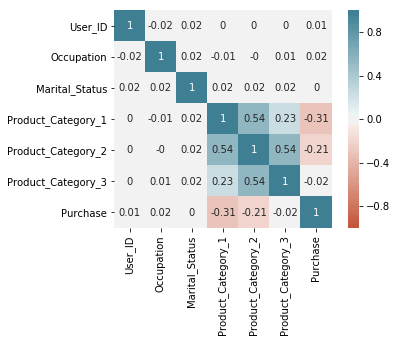

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = round(data.corr(method='pearson'), 2)
sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, annot=True, cmap=sns.diverging_palette(20, 220, n=200), square=True)

### 4. Set Dependent & Independent Variables

Specify below in string which variable (i.e. column) will be used as dependent variable. This variable will be set as y (i.e. label) and will ultimately be modeled. Also, specify a list of other (independent) variables in string that are used to explain the dependent variable. If empty, all other variables will be used.

In [11]:
dependent = 'City_Category'  # fill in your dependent variable here...
independent = ['Age','Occupation','Marital_Status', 'Stay_In_Current_City_Years', 'Product_Category_1']  # fill the list of independent variables here...

### 5. Set Parameter Values

Specify below the parameter values used while comparing models. If kept commented, the default value will be used. If uncommented, added these parameters to the function main.

In [12]:
impute_strategy = 0.  # either a float or 'drop' (default), 'mean', 'median', 'most_frequent'
labelenc_x = ['Age', 'Stay_In_Current_City_Years']  # fill the list of independent variables for label encoding here...
onehotenc_x = ['Age']  # fill the list of independent variables for one hot encoding
labelenc_y = True  # boolean specifying if label encoding for y variable is necessary
feature_scaling = 'auto'  # None, 'standardisation', 'minmax' or 'auto'

### 6. Generate Predictions

Predictions are generated for several models using the function main from the Python script compare_models. Note that if not specified differently, all default parameter values are used. More information can be retrieved by running main_classification()

In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from functions.compare_models import main_classification
predictions, classes = main_classification(data, dependent, independent, impute_strategy=impute_strategy, labelenc_x=labelenc_x, onehotenc_x=onehotenc_x, feature_scaling_method=feature_scaling)

### 7. Compare Models

Models are compared based on predictive performance metrics that are calculated and sorted by the function sort_compute_metrics_clf in the Python script compare_models. The confusion matrices are drawn using the function draw_confusion_matrix in the Python script compare_models. More information on both function can be retrieved using sort_compute_metrics_clf() and draw_confusion_matrix().

In [14]:
from functions.compare_models import sort_compute_metrics_clf
multi_class = True if len(classes) > 2 else False
header, scores = sort_compute_metrics_clf(predictions, multi_class=multi_class)
pd.DataFrame(scores, columns=header)

C:\Users\RoosRooijakkers\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,model,accuracy,precision,recall,F1,auc
0,RandomForest,0.905,0.907288,0.905,0.905320,-
1,knn,0.825,0.835139,0.825,0.821432,-
2,svc,0.765,0.781242,0.765,0.763956,-
3,logistic,0.590,0.582109,0.590,0.583115,-
4,naive,0.475,0.551250,0.475,0.326314,-


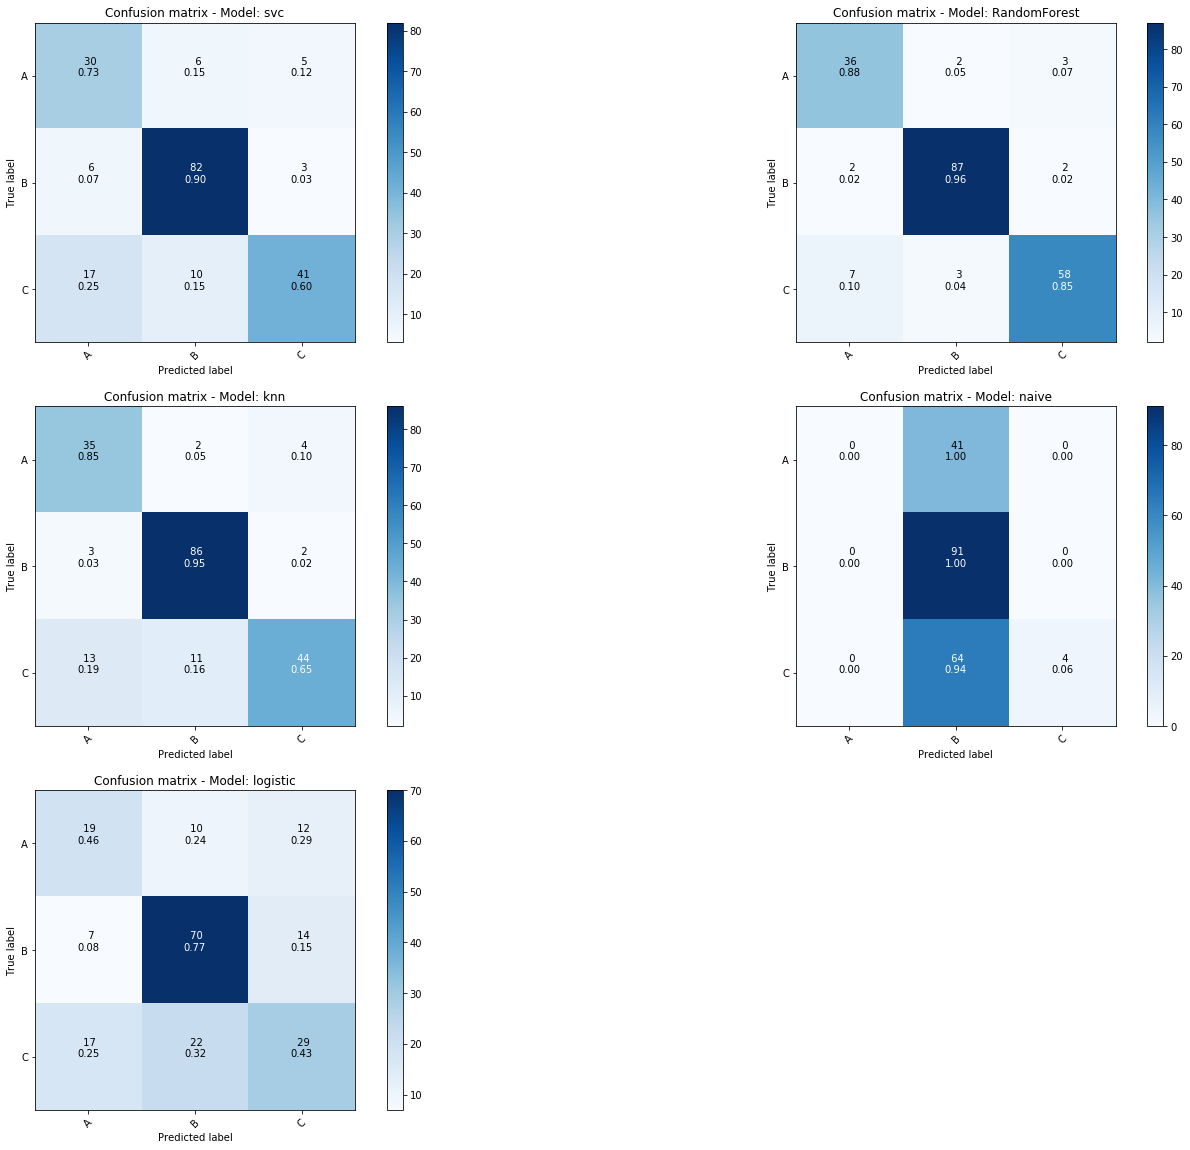

In [15]:
from functions.compare_models import draw_confusion_matrix
%matplotlib inline
draw_confusion_matrix(predictions, classes)